In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine,text
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
#insurance_df = pd.read_sql_query('select * from medicalcosts',con=engine)

house_prices_df = pd.DataFrame(engine.connect().execute(text('select * from houseprices')))

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [5]:
print(house_prices_df['alley'].isnull())

0       True
1       True
2       True
3       True
4       True
        ... 
1455    True
1456    True
1457    True
1458    True
1459    True
Name: alley, Length: 1460, dtype: bool


In [7]:
print(house_prices_df['yearbuilt'].isnull())

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: yearbuilt, Length: 1460, dtype: bool


In [8]:
print(house_prices_df['roofstyle'].isnull())

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: roofstyle, Length: 1460, dtype: bool


In [9]:
print(house_prices_df['utilities'].isnull())

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: utilities, Length: 1460, dtype: bool


In [10]:
house_prices_df['alley'].isnull().sum()*100/house_prices_df['alley'].isnull().count()

93.76712328767124

In [11]:
house_prices_df['yearbuilt'].isnull().sum()*100/house_prices_df['yearbuilt'].isnull().count()

0.0

In [12]:
house_prices_df['utilities'].isnull().sum()*100/house_prices_df['utilities'].isnull().count()

0.0

In [13]:
house_prices_df['roofstyle'].isnull().sum()*100/house_prices_df['roofstyle'].isnull().count()

0.0

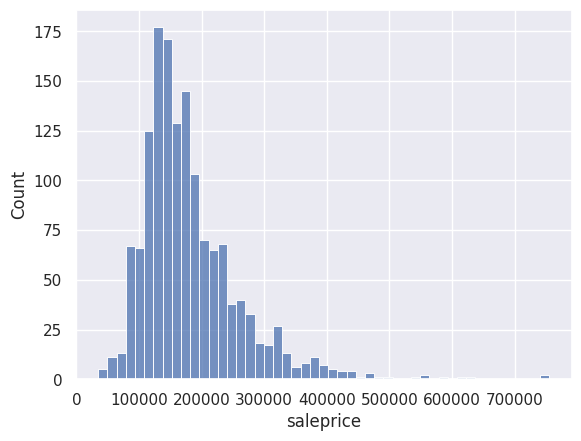

In [6]:
import seaborn as sns
sns.set()
ax = sns.histplot(house_prices_df['saleprice'])